In [2]:
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [8]:
%store -r Mmax
%store -r Mmin 
%store -r MEd_slu
MEd_slu 

,MEd+ [kN m],smax [m],MEd- [kN m],smin [m]
Section,,,,
C1,95.1842,1.25,NaN,NaN
N2,NaN,NaN,-196.506,3
C2,156.563,5.31,0,NaN
N3,NaN,NaN,-215.976,7.5
C3,124.347,9.55,-39.6907,9.47
N4,NaN,NaN,-209.989,11.5
C4,151.829,13.95,-6.19069,13.74
N5,NaN,NaN,-234.169,16.5
C5,144.51,19.55,0,NaN


In [20]:
smax = MEd_slu[['smax [m]']].to_numpy()
smin = MEd_slu[['smin [m]']].to_numpy()

ss = np.sort((np.concatenate((smax, smin))).reshape(-1))
ss = np.insert(ss, -1, 26.65)
ss

array([1.25, nan, 3.0, 5.31, 7.5, 9.47, 9.55, 11.5, 13.74, 13.95, 16.5,
       19.55, 22.65, 25.0, nan, nan, nan, nan, nan, nan, nan, 26.65, nan],
      dtype=object)

In [29]:
MR1t = 50* np.ones(1000)

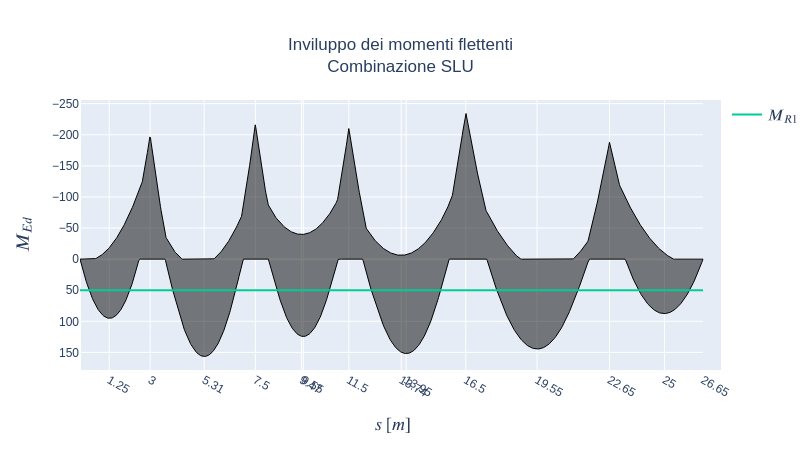

In [33]:
s = np.linspace(0,26.65, num=1000)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x = s,
    y = Mmax,
    name='M+',
    line_color='#000000',
    showlegend=False,
    line = dict(width=1)
))

fig.add_trace(go.Scatter(
    x = s,
    y = Mmin,
    name='M-',
    line_color='#000000',
    fill='tonexty',
    showlegend=False,
    line = dict(width=1)
))

fig.add_trace(go.Scatter(
    x = s, 
    y = MR1t,
    name=r'$M_{R1}$'
))

fig.update_yaxes(autorange="reversed")
fig.update_traces(mode='lines')
fig.update_layout(
    title_text=('Inviluppo dei momenti flettenti<br>' + 'Combinazione SLU'),
    title_x=.5,
    autosize=True,
    xaxis = dict(
        tickmode='array',
        tickvals=ss,
        ticktext=ss,
        title=r'$s\,[m]$',
    ),
    yaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 50,
        title=r'$M_{Ed}$'
    ),
    xaxis_showgrid=True, 
    yaxis_showgrid=True,
)

fig.update_yaxes(automargin=True)
fig.show()